In [2]:
!unzip /content/datasets.zip

Archive:  /content/datasets.zip
   creating: datasets/
   creating: datasets/test/
   creating: datasets/test/dangerous/
  inflating: datasets/test/dangerous/images (586).jpg  
  inflating: datasets/test/dangerous/images (587).jpg  
  inflating: datasets/test/dangerous/images (588).jpg  
  inflating: datasets/test/dangerous/images (589).jpg  
  inflating: datasets/test/dangerous/images (590).jpg  
  inflating: datasets/test/dangerous/images (591).jpg  
  inflating: datasets/test/dangerous/images (592).jpg  
  inflating: datasets/test/dangerous/images (593).jpg  
  inflating: datasets/test/dangerous/images (594).jpg  
  inflating: datasets/test/dangerous/images (595).jpg  
  inflating: datasets/test/dangerous/images (596).jpg  
  inflating: datasets/test/dangerous/images (597).jpg  
  inflating: datasets/test/dangerous/images (598).jpg  
  inflating: datasets/test/dangerous/images (599).jpg  
  inflating: datasets/test/dangerous/images (600).jpg  
  inflating: datasets/test/dangerous/im

In [3]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
session = InteractiveSession(config=config)

In [4]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [5]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/datasets/train'
valid_path = '/content/datasets/test'

In [6]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 1s 0us/step


In [7]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [8]:

# useful for getting number of output classes
folders = glob('/content/datasets/train/*')

In [9]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [11]:

# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 858 images belonging to 2 classes.


In [15]:
test_set = test_datagen.flow_from_directory('/content/datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 150 images belonging to 2 classes.


In [16]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
27/27 [==============================] - 117s 4s/step - loss: 1.5378 - accuracy: 0.8531 - val_loss: 1.7874 - val_accuracy: 0.8800
Epoch 2/10
27/27 [==============================] - 111s 4s/step - loss: 0.5607 - accuracy: 0.9510 - val_loss: 0.9061 - val_accuracy: 0.9067
Epoch 3/10
27/27 [==============================] - 111s 4s/step - loss: 0.1913 - accuracy: 0.9779 - val_loss: 0.6625 - val_accuracy: 0.9267
Epoch 4/10
27/27 [==============================] - 111s 4s/step - loss: 0.1998 - accuracy: 0.9744 - val_loss: 1.0287 - val_accuracy: 0.9000
Epoch 5/10
27/27 [==============================] - 111s 4s/step - loss: 0.1186 - accuracy: 0.9814 - val_loss: 0.5167 - val_accuracy: 0.9400
Epoch 6/10
27/27 [==============================] - 111s 4s/step - loss: 0.0728 - accuracy: 0.9860 - val_loss: 0.5617 - val_accuracy: 0.9400
Epoch 7/10
27/27 [==============================] - 111s 4s/step - loss: 0.0376 - accuracy: 0.9895 - val_loss: 1.4319 - val_accuracy: 0.8533
Epoch 8/10
27

In [17]:
import matplotlib.pyplot as plt

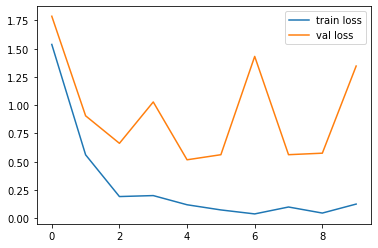

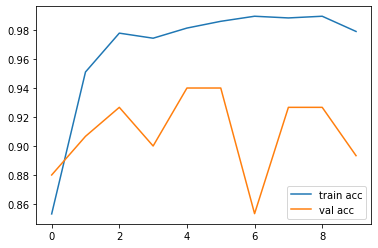

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [21]:
import numpy as np
import seaborn as sns; sns.set_theme()
sns.set(font_scale=2)

In [71]:
x=r.history['loss']
y=r.history['val_loss']
p=r.history['accuracy']
q=r.history['val_accuracy']

loss= x[-1]
val_loss=y[-1]
accuracy=p[-1]
val_accuracy=q[-1]
print(loss)
print(val_loss)
print(accuracy)
print(val_accuracy)


0.12467887252569199
1.346652626991272
0.9790209531784058
0.8933333158493042


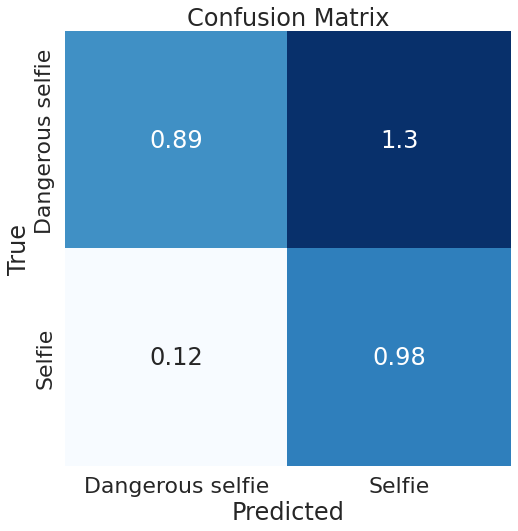

In [74]:
()

def plot_matrix(cm, classes, title):
  f,ax = plt.subplots(figsize=(8, 8))
  ax = sns.heatmap(cm, cmap="Blues", annot=True, xticklabels=classes, yticklabels=classes, cbar=False)
  ax.set(title=title, xlabel="Predicted", ylabel="True")
 

cm = [val_accuracy, val_loss], [loss, accuracy]


classes = ['Dangerous selfie', 'Selfie']
title = "Confusion Matrix"
plot_matrix(cm, classes, title)
